# Lead Scoring Case Study

## Importing Data

In [3]:
# Importing the Necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:
# Reading the dataset
df = pd.read_csv('/Users/rheniusrajkumar/Downloads/Lead Scoring Assignment/Leads.csv')

## Inspecting Dataframe

In [6]:
# Printing the top 5 values
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Checking the number of rows & columns in the dataset
df.shape

(9240, 37)

In [8]:
# Percentage of null values present in the columns
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Step 3: Data Preparation

In [11]:
# Exctracting the columns that have more than 35% of null values and appending
above35_null_col = []
for i in df.columns:
    if (df[i].isnull().mean())*100>35:
        above35_null_col.append(i)

In [12]:
# Droping the columns that were appended above
for i in above35_null_col:
    df.drop(i, axis=1, inplace=True)

In [13]:
# Rechecking the null values after droping the columns
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [14]:
# Descriptive statistics for the numercial variables in the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [15]:
# Reviewing the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
# Storing all the non-numeric columns in another variable
object_cols = df.select_dtypes(include='object')
object_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
# Printing the value counts for the non-numeric columns
for col in object_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print()
    print("***************************************")
    print()

Value counts for column 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64

***************************************

Value counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

***************************************

Value counts for column 'Lead Source':
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           17

In [20]:
# Replacing the values with 'Select' to null as the relevent answer was not selected at that time
df = df.replace('Select',np.nan)

In [21]:
# Rechecking the null values after replacing select
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [23]:
# Checking the number of unique values in all the columns
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [25]:
# Deleting Prospect ID as it is an unique id

In [27]:
# Dropping columns with one value, significanlty one sided, more than 35% null values
df.drop(columns = ["Prospect ID", "Do Not Call","What matters most to you in choosing a course" ,"Search","Magazine", "X Education Forums","Newspaper" ,"Newspaper Article", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "How did you hear about X Education","Lead Profile", "City", "Specialization", "Lead Number"], inplace = True, axis = 1)

In [29]:
# Checking the null values in the remaining columns
(100*(df.isnull().sum()/len(df))).sort_values(ascending=False)

What is your current occupation           29.112554
Country                                   26.634199
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [30]:
# In the variable country more than 70% of the values are India, and the every other country are only a fraction of the entire dateset
# Hence renaming the country names of all the other countries apart from India to "outside india"

def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

Country
India            6492
outside india    2748
Name: count, dtype: int64

In [31]:
# Filling the null values in the occupation columns as not provided
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided') 

In [32]:
# As the remaining null values are less than 1%, dropping them
df = df.dropna()

In [33]:
#Creating a copy of the dataset
df1 = df.copy(deep=True)

## EDA

### Univariate Analysis

In [36]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,outside india,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,Modified


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
 

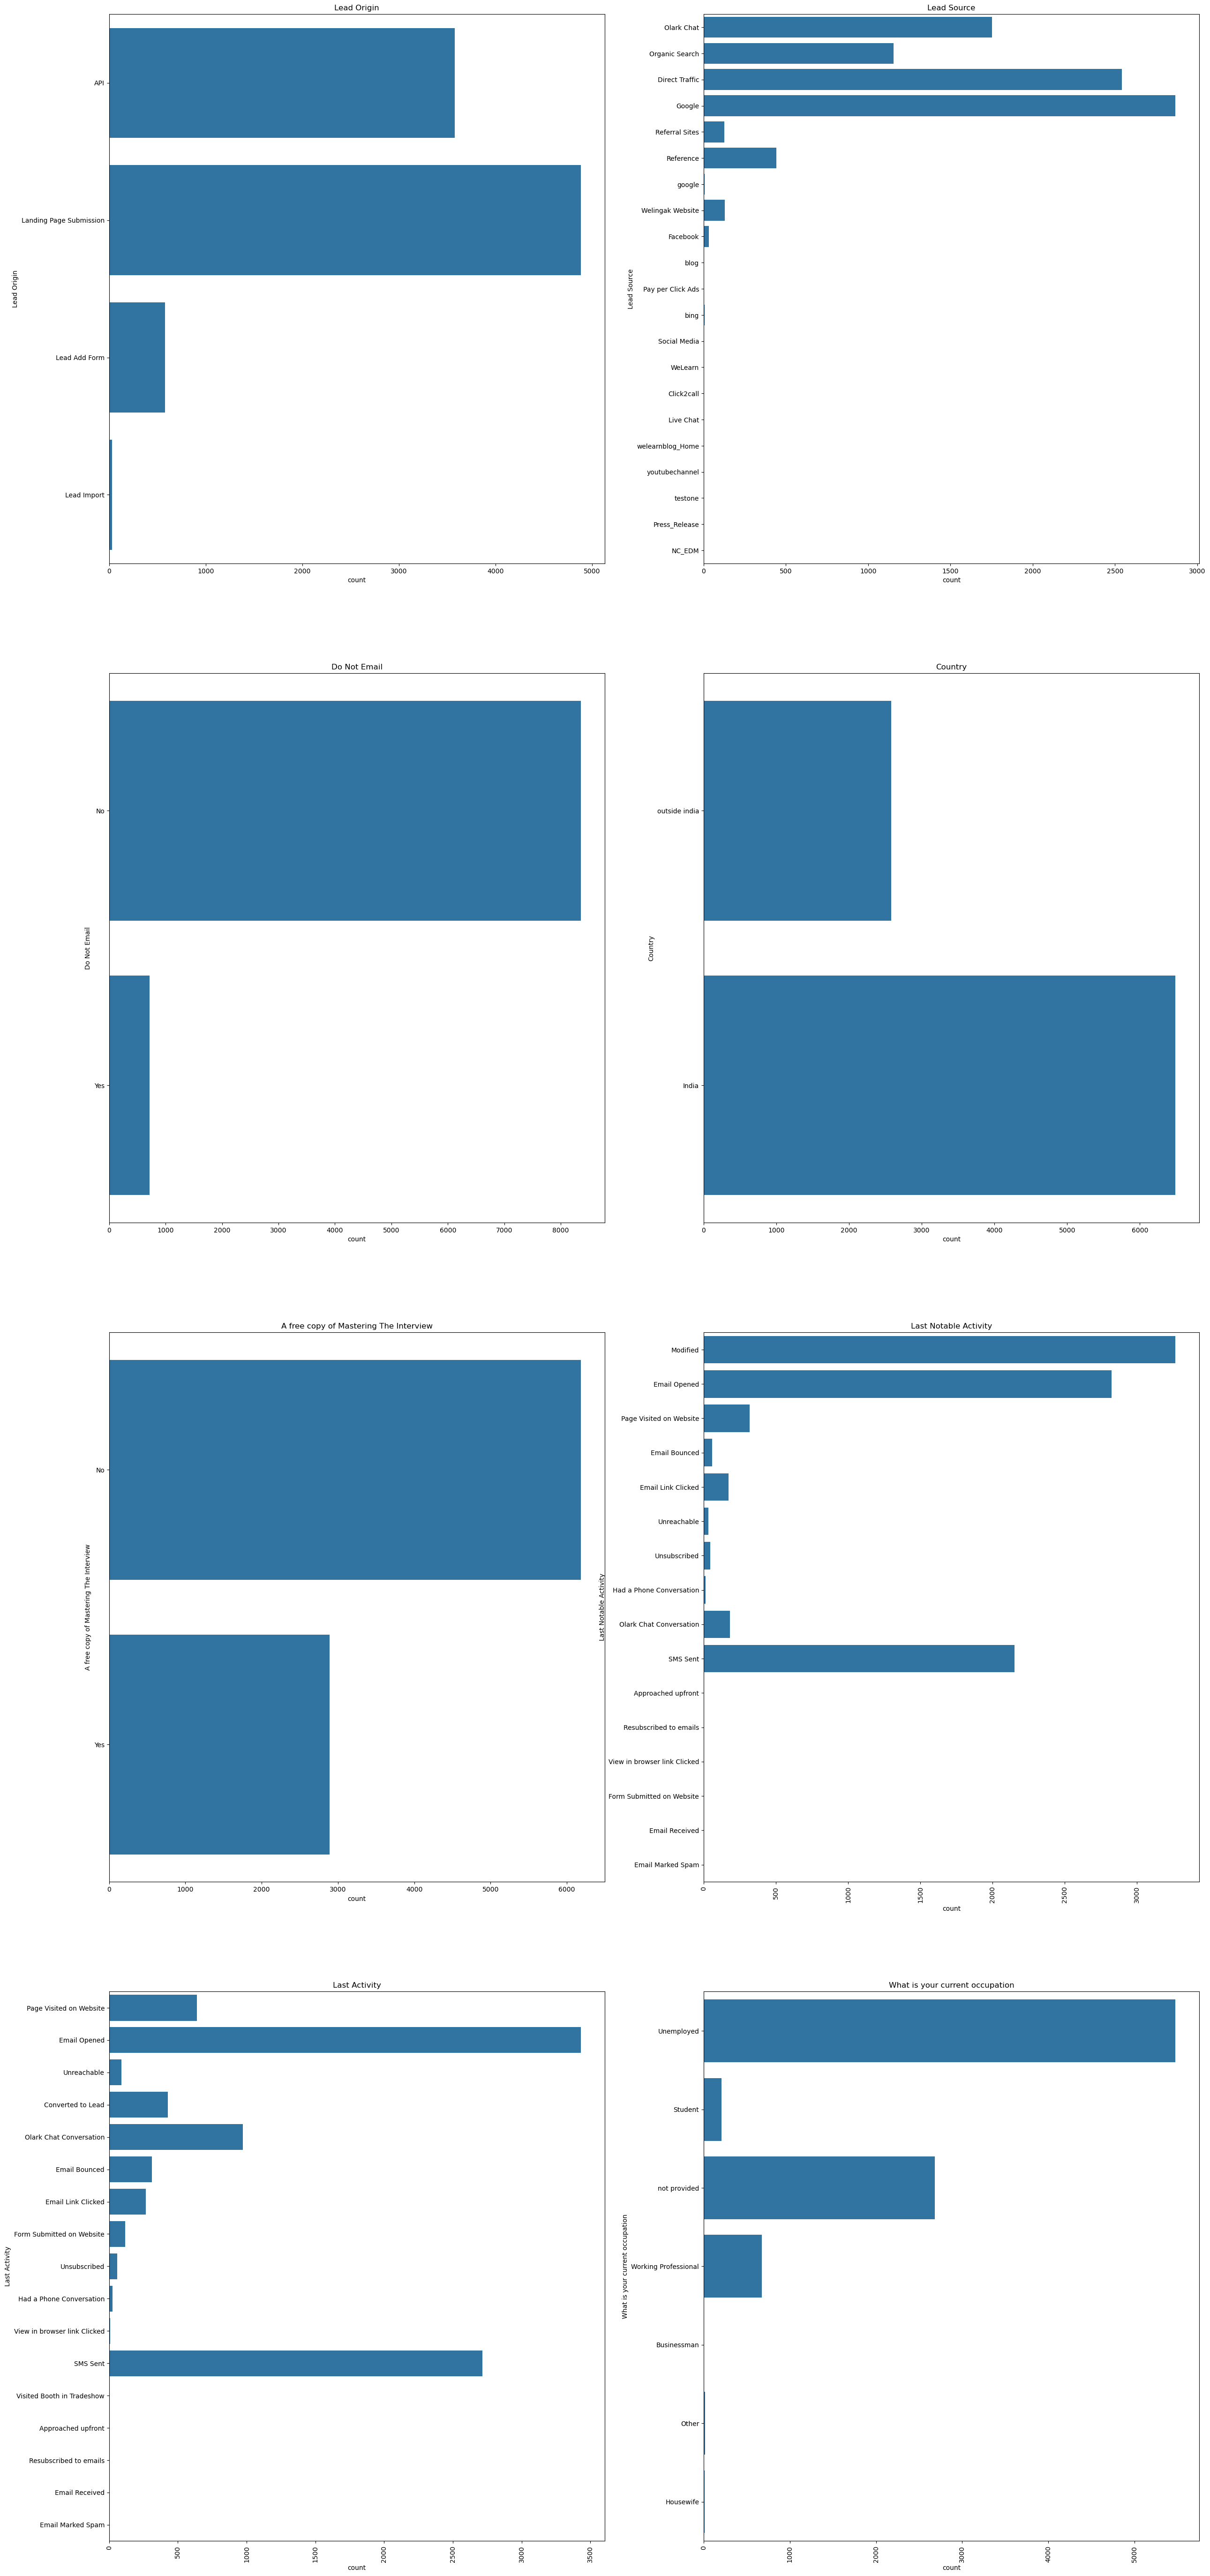

In [38]:
# Creating sub plots of all the non-numeric columns

plt.figure(figsize = (30,70))

plt.subplot(4,2,1)
sns.countplot(df1['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(df1['Lead Source'])
plt.title('Lead Source')

plt.subplot(4,2,3)
sns.countplot(df1['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,4)
sns.countplot(df1['Country'])
plt.title('Country')

plt.subplot(4,2,5)
sns.countplot(df1['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,2,6)
sns.countplot(df1['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(4,2,7)
sns.countplot(df1['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(4,2,8)
sns.countplot(df1['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')


plt.show()

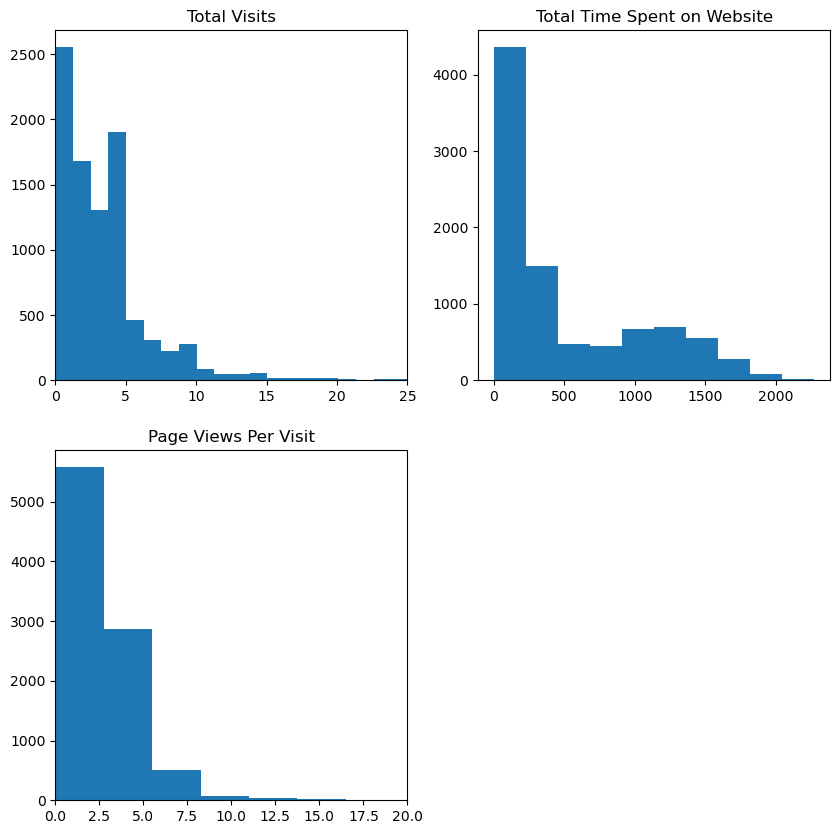

In [39]:
# Creating a histogram for the numerical columns

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df1['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df1['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df1['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
 

### Bivariate Analysis

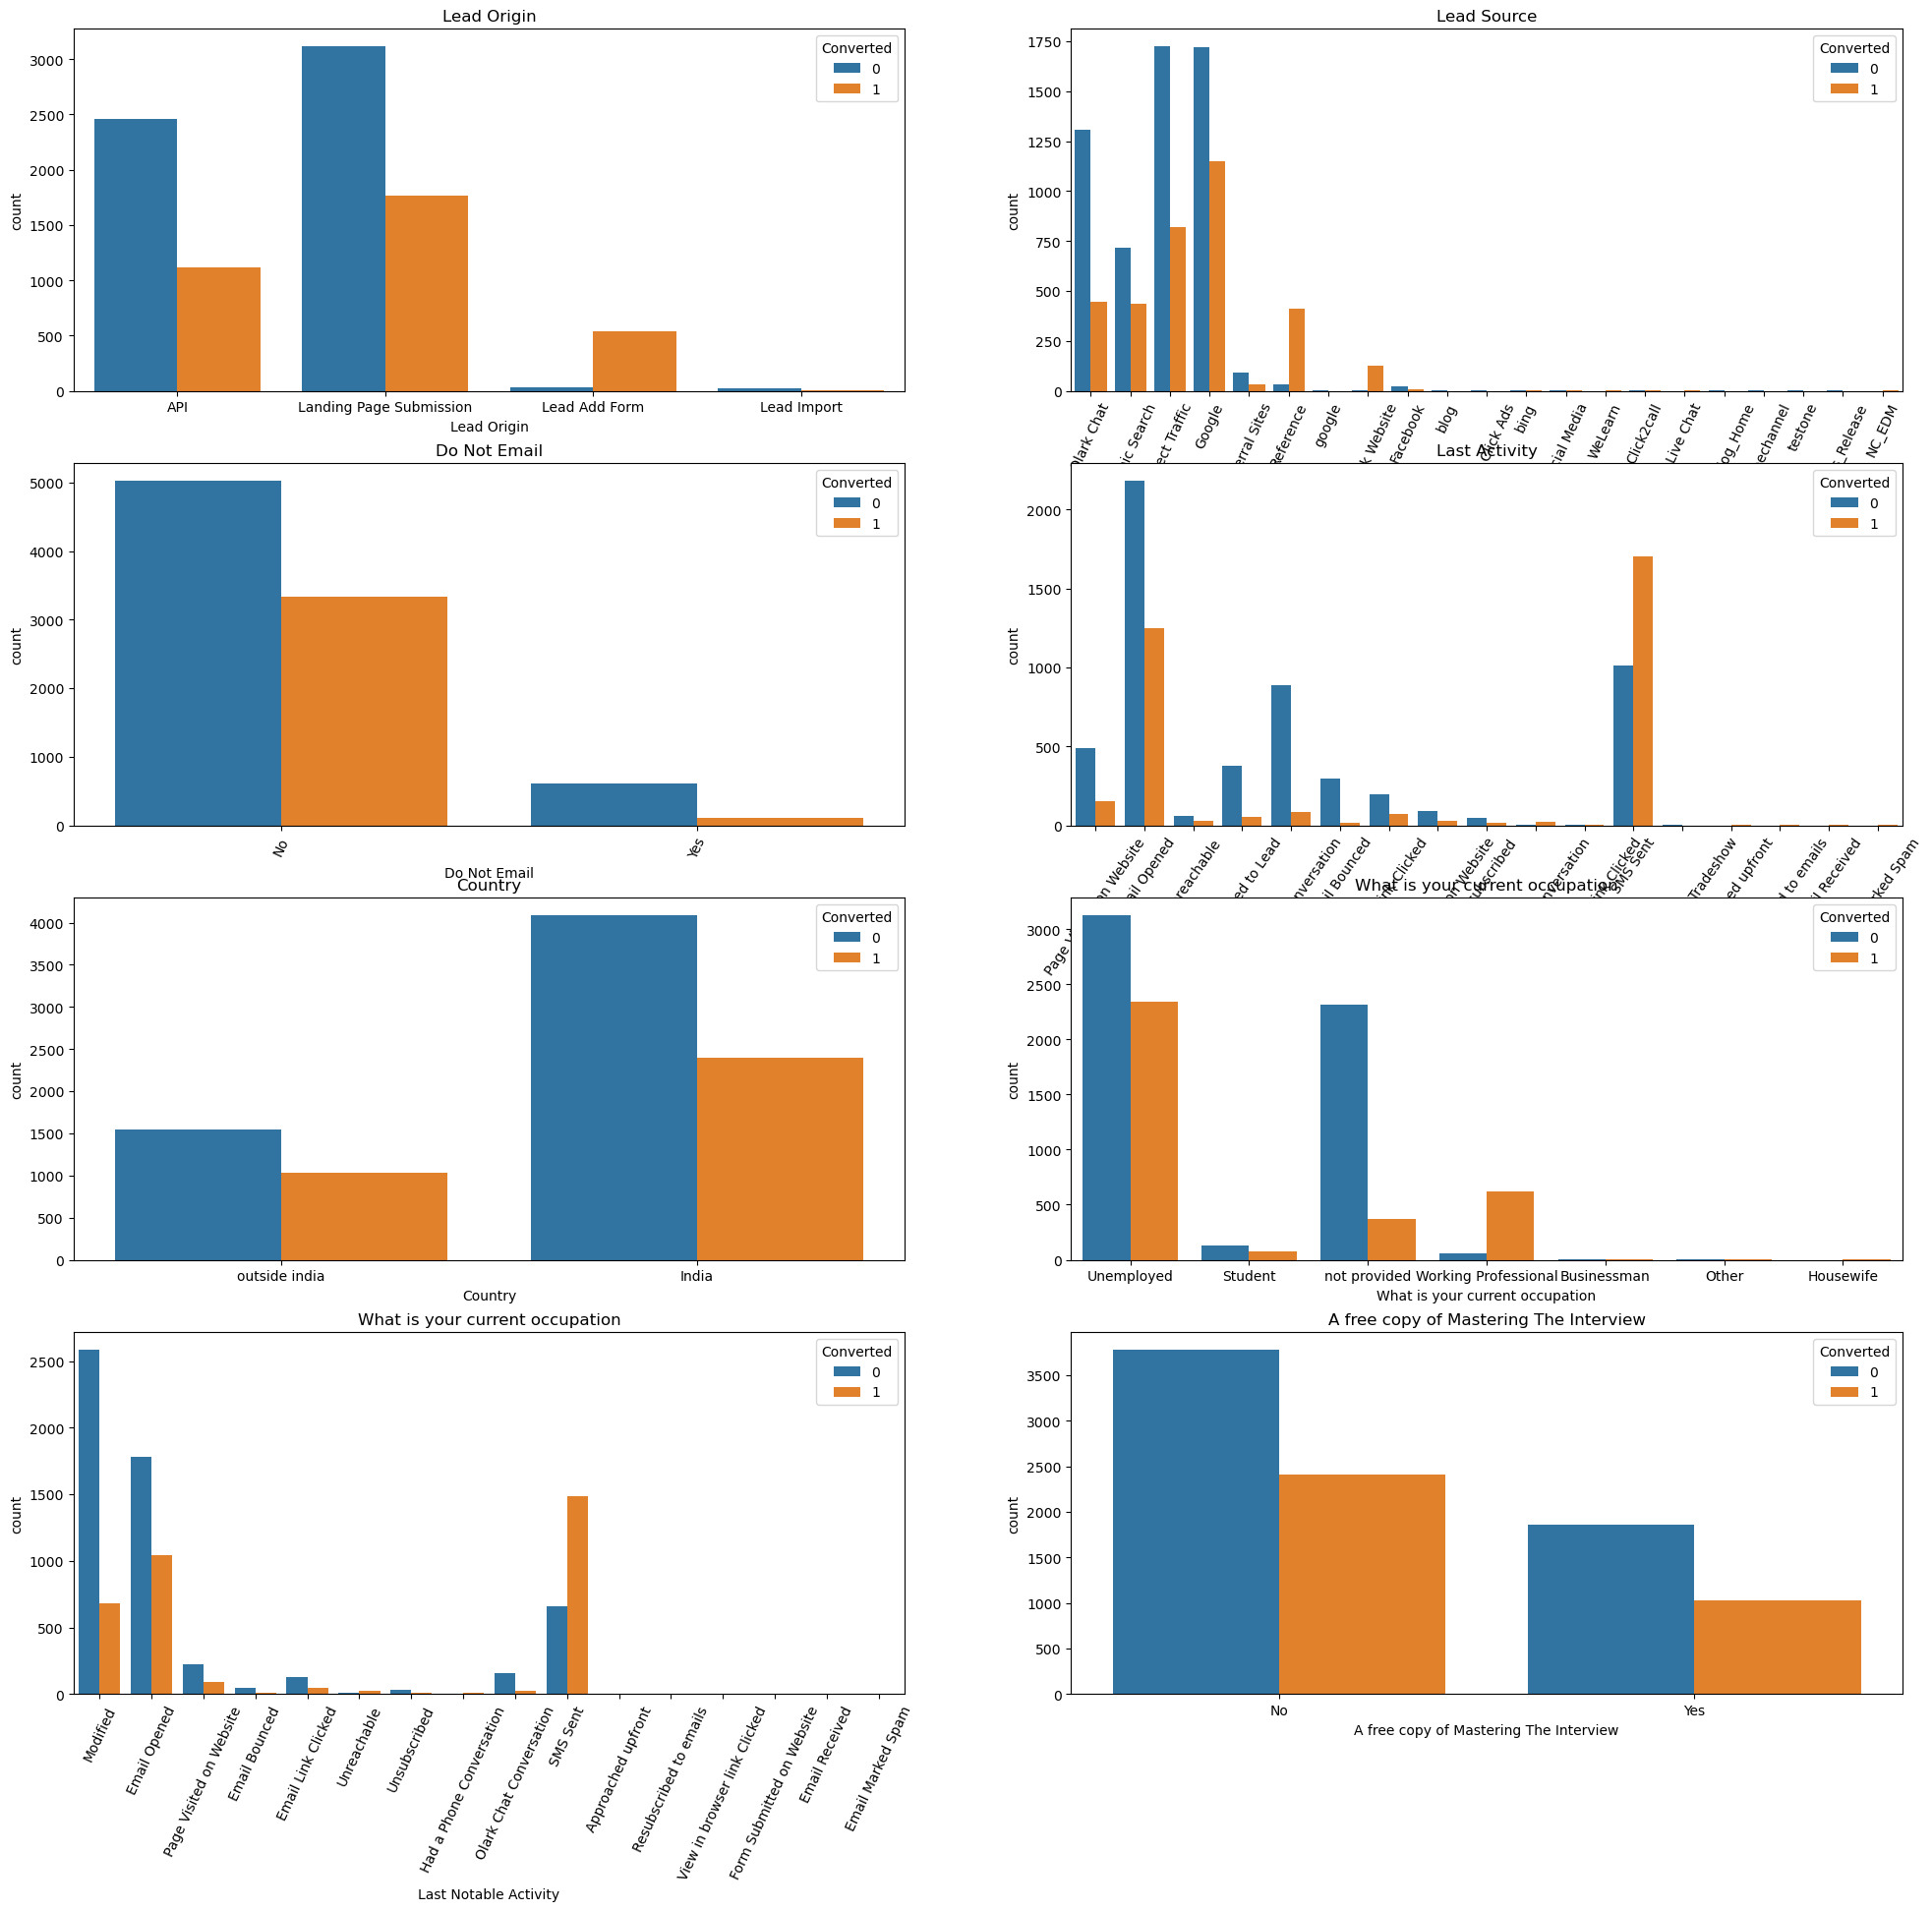

In [42]:
# Creating a countplot to understand the relationship of all the non-numeric variabls with the targer variable: Converted

plt.figure(figsize = (24,22))

plt.subplot(4,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df1)
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df1).tick_params(axis='x', rotation = 65)
plt.title('Lead Source')

plt.subplot(4,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df1).tick_params(axis='x', rotation = 65)
plt.title('Do Not Email')

plt.subplot(4,2,4)
sns.countplot(x='Last Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 55)
plt.title('Last Activity')

plt.subplot(4,2,5)
sns.countplot(x='Country', hue='Converted', data= df1)
plt.title('Country')

plt.subplot(4,2,6)
sns.countplot(x='What is your current occupation', hue='Converted', data= df1)
plt.title('What is your current occupation')

plt.subplot(4,2,7)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df1).tick_params(axis='x', rotation = 65)
plt.title('What is your current occupation')

plt.subplot(4,2,8)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df1)
plt.title('A free copy of Mastering The Interview')
   

plt.show()

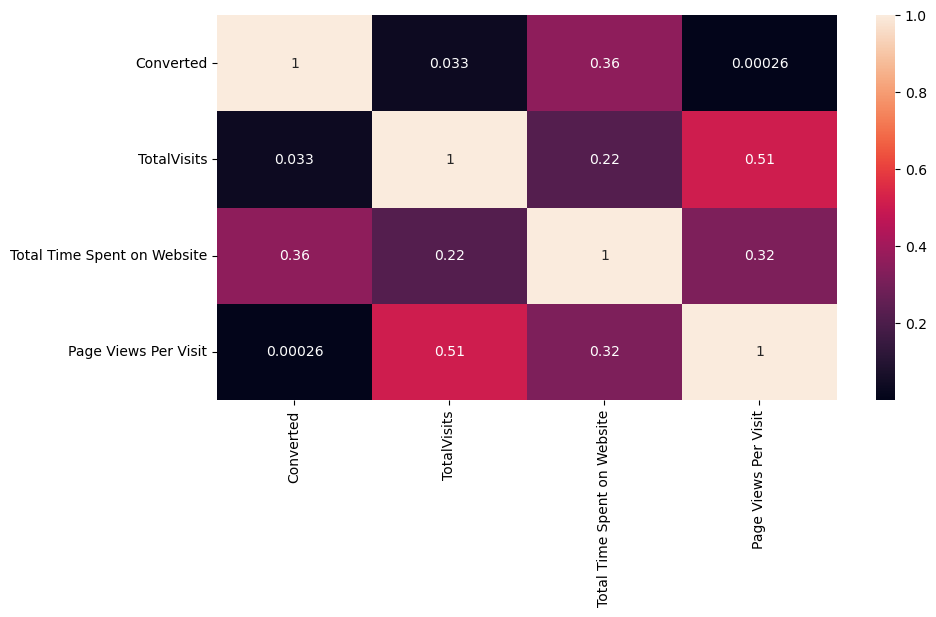

In [44]:
 #Creating a heatmat to understand the correlations between the variables
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(numeric_only = True), annot=True)
plt.show()

In [45]:
# Looking at the outliers in the numerical columns, no siginificant outliers detected
df1.select_dtypes(include='number').describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


In [46]:
# Overview of the non-numerical data
df1.select_dtypes(exclude='number').describe()

,Lead Origin,Lead Source,Do Not Email,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074
unique,4,21,2,17,2,7,2,16
top,Landing Page Submission,Google,No,Email Opened,India,Unemployed,No,Modified
freq,4885,2868,8358,3432,6491,5476,6186,3267


## Dummy Variables

In [48]:
# Creating dummy variables for the categorical columns
dummy = pd.get_dummies(df1.select_dtypes(exclude='number'), drop_first=True, dtype=int)

In [49]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Adding the above created dummy variables back to the dataset
df2 = pd.concat([df1, dummy], axis=1)

In [51]:
# Dropping the columns as dummy variables have been created
df2 = df2.drop(columns=['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Country','What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'],axis= 1)
df2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Checking the newly created columns
df2.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
    

## Splitting into test & train

In [54]:
# Moving the target variable column from df before the test-train spit
X = df2.drop(columns = ['Converted'], axis = 1)
y = df2['Converted']

In [55]:
# Splitting the dataset into testing and traing at at 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [56]:
# Scaling the non-dummy columns in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3563,0.007968,0.308979,0.036364,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
273,0.019920,0.129401,0.045455,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1903,0.007968,0.041373,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4982,0.011952,0.780810,0.054545,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3213,0.011952,0.132042,0.054545,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


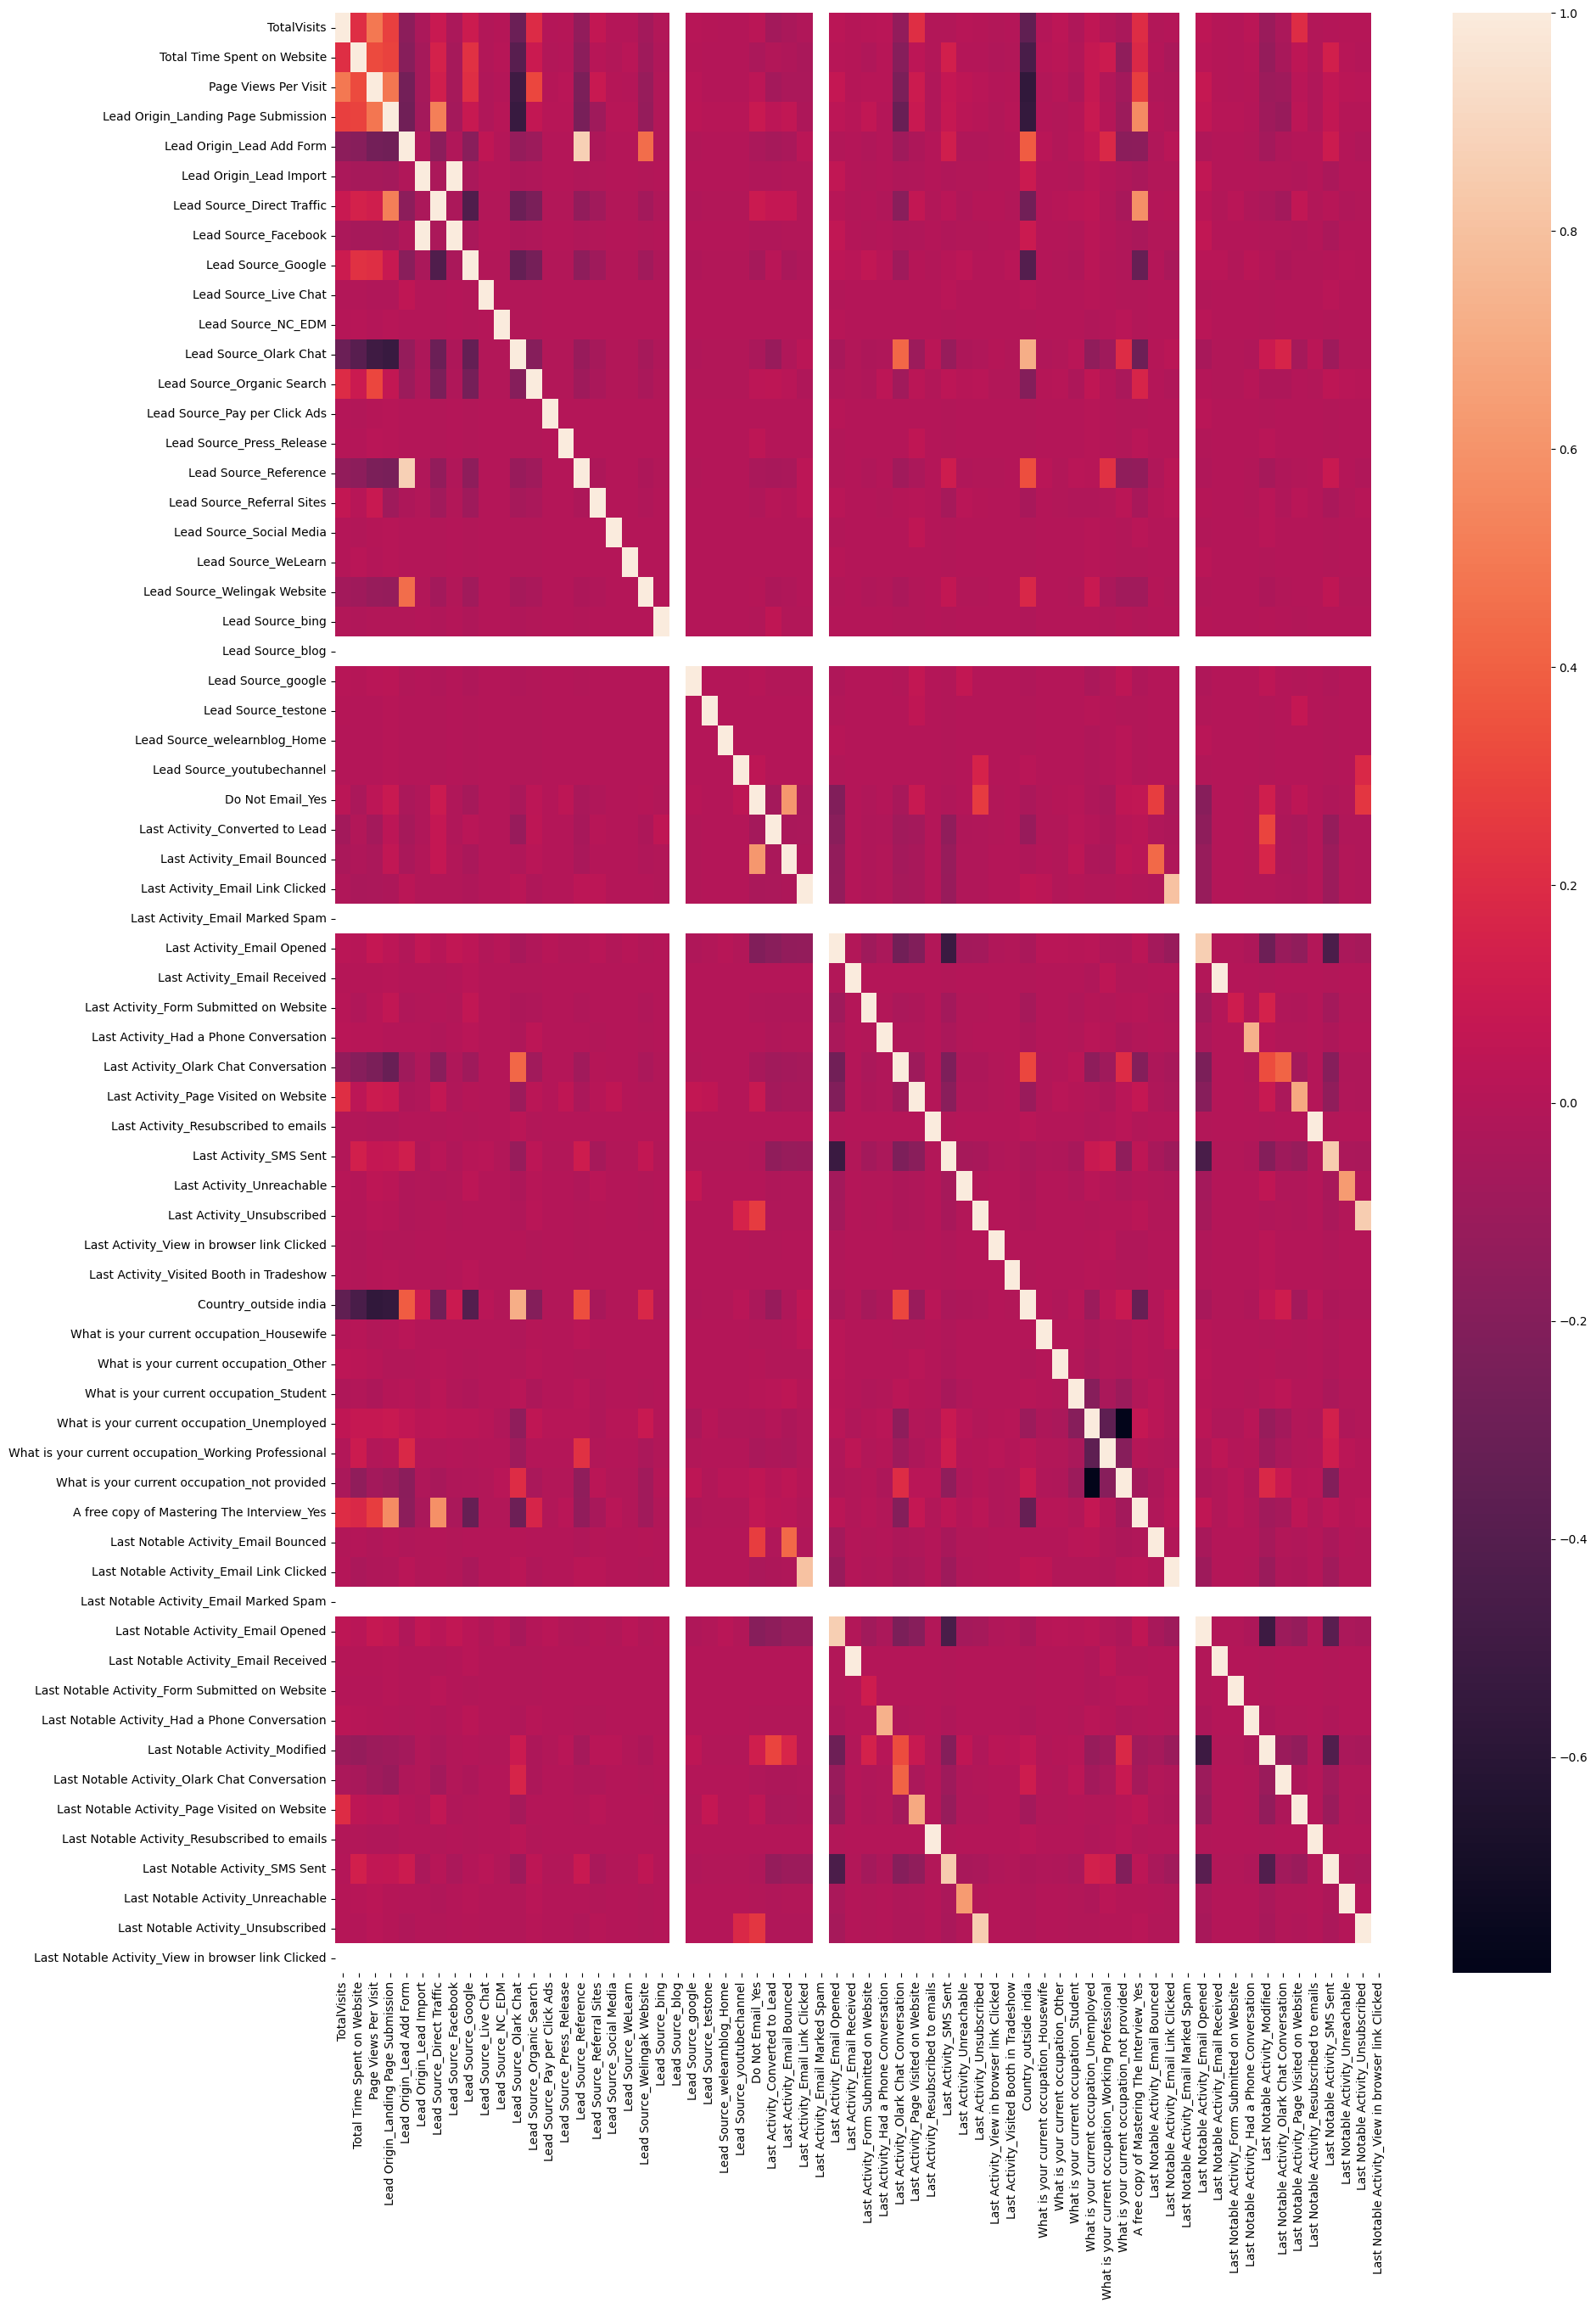

In [57]:
# Heatmap of all the columns
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Modelling

In [59]:
logreg = LogisticRegression()

In [60]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 38),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_blog', False, 51),
 ('Lead Source_google', False, 23),
 ('Lead Source_testone', False, 30),
 ('Lead Source_welearnblog_Home', False, 37),
 ('L

In [62]:
# Put all the columns selected by RFE in the variable 'selected_col'
selected_col = X_train.columns[rfe.support_]

In [63]:
# Selecting columns selected by RFE
X_train = X_train[selected_col]

In [64]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.4
Date:                Mon, 20 Jan 2025   Deviance:                       5270.8
Time:                        11:37:47   Pearson chi2:                 6.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5875      0.099      5.959      0.000       0.394       0.781
Total Time Spent on Website                              4.5319      0.170     26.731      0.000       4.200       4.864
Lead Origin_Lead Add Form                                2.4164      0.232     10.404      0.000       1.961       2.872
Lead Source_Direct Traffic                              -1.6901      0.116    -14.616      0.000      -1.917      -1.463
Lead Source_Google                                      -1.2971      0.111    -11.678      0.000      -1.515      -1.079
Lead Source_Organic Search                              -1.3271      0.131    -10.137      0.000      -1.584      -1.071
Lead Source_Referral Sites                              -1.6723      0.335     -4.997      0.000      -2.328      -1.016
Lead Source_Welingak Website                             2.4775      1.036      2.392      0.017       0.447       4.508
Do Not Email_Yes                                        -1.6063      0.174     -9.235      0.000      -1.947      -1.265
Last Activity_Olark Chat Conversation                   -1.5693      0.168     -9.363      0.000      -1.898      -1.241
What is your current occupation_Working Professional     2.3699      0.174     13.588      0.000       2.028       2.712
What is your current occupation_not provided            -1.1558      0.087    -13.320      0.000      -1.326      -0.986
Last Notable Activity_Email Link Clicked                -1.4444      0.261     -5.540      0.000      -1.955      -0.933
Last Notable Activity_Email Opened                      -1.1239      0.084    -13.382      0.000      -1.288      -0.959
Last Notable Activity_Had a Phone Conversation          22.1235    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
Last Notable Activity_Modified                          -1.4370      0.090    -16.047      0.000      -1.612      -1.261
========================================================================================================================
"""

In [65]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.31
3,Lead Source_Google,2.22
14,Last Notable Activity_Modified,2.09
2,Lead Source_Direct Traffic,2.05
12,Last Notable Activity_Email Opened,1.70
10,What is your current occupation_not provided,1.52
4,Lead Source_Organic Search,1.46
1,Lead Origin_Lead Add Form,1.45
8,Last Activity_Olark Chat Conversation,1.35
6,Lead Source_Welingak Website,1.29


In [66]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.0
Date:                Mon, 20 Jan 2025   Deviance:                       5280.0
Time:                        11:37:47   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5968      0.099      6.053      0.000       0.404       0.790
Total Time Spent on Website                              4.5228      0.169     26.706      0.000       4.191       4.855
Lead Origin_Lead Add Form                                2.4160      0.232     10.400      0.000       1.961       2.871
Lead Source_Direct Traffic                              -1.6856      0.116    -14.585      0.000      -1.912      -1.459
Lead Source_Google                                      -1.2895      0.111    -11.619      0.000      -1.507      -1.072
Lead Source_Organic Search                              -1.3195      0.131    -10.091      0.000      -1.576      -1.063
Lead Source_Referral Sites                              -1.6696      0.335     -4.988      0.000      -2.326      -1.014
Lead Source_Welingak Website                             2.4783      1.036      2.392      0.017       0.448       4.509
Do Not Email_Yes                                        -1.6141      0.174     -9.279      0.000      -1.955      -1.273
Last Activity_Olark Chat Conversation                   -1.5716      0.168     -9.376      0.000      -1.900      -1.243
What is your current occupation_Working Professional     2.3669      0.174     13.573      0.000       2.025       2.709
What is your current occupation_not provided            -1.1598      0.087    -13.367      0.000      -1.330      -0.990
Last Notable Activity_Email Link Clicked                -1.4545      0.261     -5.580      0.000      -1.965      -0.944
Last Notable Activity_Email Opened                      -1.1348      0.084    -13.528      0.000      -1.299      -0.970
Last Notable Activity_Modified                          -1.4470      0.089    -16.175      0.000      -1.622      -1.272
========================================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,2.31
3,Lead Source_Google,2.21
13,Last Notable Activity_Modified,2.09
2,Lead Source_Direct Traffic,2.05
12,Last Notable Activity_Email Opened,1.69
10,What is your current occupation_not provided,1.52
1,Lead Origin_Lead Add Form,1.45
4,Lead Source_Organic Search,1.45
8,Last Activity_Olark Chat Conversation,1.35
6,Lead Source_Welingak Website,1.29


## Prediction

In [70]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3563    0.576547
273     0.224042
1903    0.162411
4982    0.846047
3213    0.171855
7029    0.101941
6579    0.763222
1384    0.081808
6440    0.829571
2369    0.027076
dtype: float64

In [71]:
# Reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.57654714, 0.22404174, 0.16241058, 0.84604678, 0.17185502,
       0.10194132, 0.76322174, 0.08180828, 0.82957119, 0.02707573])

In [72]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Prob of Conversion':y_train_pred})
y_train_pred_final.head()

,Converted,Prob of Conversion
0,1,0.576547
1,0,0.224042
2,0,0.162411
3,1,0.846047
4,0,0.171855


In [73]:
# Substituting 0 or 1 with the cut off
y_train_pred_final['Predicted'] = y_train_pred_final["Prob of Conversion"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Prob of Conversion,Predicted
0,1,0.576547,1
1,0,0.224042,0
2,0,0.162411,0
3,1,0.846047,1
4,0,0.171855,0


## Evaluation

In [75]:
# Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3524,  428],
       [ 766, 1633]])

In [76]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8119981105337742

In [77]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [78]:
# Sensitivity
TP/(TP+FN)

0.6807002917882451

In [79]:
# Specificity
TN/(TN+FP)

0.8917004048582996

## Model Optimisation using ROC Curve 

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final["Prob of Conversion"], drop_intermediate = False )


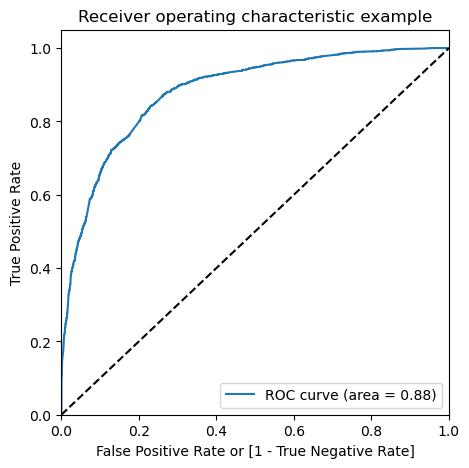

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final["Prob of Conversion"])

In [84]:
# Creating columns with different cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Prob of Conversion"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Prob of Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.576547,1,1,1,1,1,1,1,0,0,0,0
1,0,0.224042,0,1,1,1,0,0,0,0,0,0,0
2,0,0.162411,0,1,1,0,0,0,0,0,0,0,0
3,1,0.846047,1,1,1,1,1,1,1,1,1,1,0
4,0,0.171855,0,1,1,0,0,0,0,0,0,0,0


In [85]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377736,1.000000,0.000000
0.1,0.1,0.592977,0.971655,0.363107
0.2,0.2,0.754369,0.911630,0.658907
0.3,0.3,0.792001,0.853272,0.754808
0.4,0.4,0.808062,0.743643,0.847166
0.5,0.5,0.811998,0.680700,0.891700
0.6,0.6,0.801764,0.612755,0.916498
0.7,0.7,0.777043,0.496040,0.947621
0.8,0.8,0.757833,0.408504,0.969889
0.9,0.9,0.708707,0.246353,0.989372


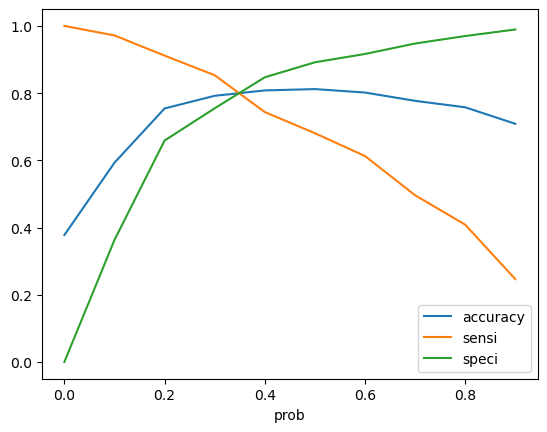

In [86]:
# Plotting the above created matrix, and deciphering a 0.35 optimal cut off 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Prob of Conversion"].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Prob of Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.576547,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.224042,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.162411,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.846047,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.171855,0,1,1,0,0,0,0,0,0,0,0,0


In [88]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7979845693591561

In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3099,  853],
       [ 430, 1969]])

In [90]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [91]:
TP/(TP+FN)

0.8207586494372655

In [92]:
TN/(TN+FP)

0.78415991902834

## Test set Prediction

In [94]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [95]:
selected_col = X_train.columns

In [96]:
# Select the columns in X_train for X_test as well
X_test = X_test[selected_col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[selected_col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
4870,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0
3315,1.0,0.660211,0,1,0,0,0,0,0,0,0,0,0,0,0
5166,1.0,0.000000,0,0,0,0,0,0,0,1,0,1,0,0,0
5210,1.0,0.600352,0,1,0,0,0,0,0,0,0,0,0,0,0
8447,1.0,0.055898,0,1,0,0,0,0,0,0,0,0,0,1,0


In [182]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.368655
1,1,0.869571
2,0,0.105776
3,1,0.835681
4,0,0.122303


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.368655,1
1,1,0.869571,1
2,0,0.105776,0
3,1,0.835681,1
4,0,0.122303,0
...,...,...,...
2718,0,0.357550,1
2719,0,0.719815,1
2720,0,0.081523,0
2721,0,0.315548,0


In [186]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.8134410576569959

In [188]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1350,  337],
       [ 171,  865]])

In [190]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [192]:
TP/(TP+FN)

0.834942084942085

In [194]:
TN/(TN+FP)

0.8002371072910492

## Final Prediction 

In [198]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.368655
1,1,0.869571
2,0,0.105776
3,1,0.835681
4,0,0.122303


In [200]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.368655,0
1,1,0.869571,1
2,0,0.105776,0
3,1,0.835681,1
4,0,0.122303,0
...,...,...,...
2718,0,0.357550,0
2719,0,0.719815,1
2720,0,0.081523,0
2721,0,0.315548,0


In [202]:
# Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8222548659566654

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1446,  241],
       [ 243,  793]])

In [206]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [210]:
TP / (TP + FP)

0.7669245647969052

In [212]:
TP / (TP + FN)

0.7654440154440154

Precision around 77% and Recall around 76%

Variables the model highly depends on:
1. Total Time Spent on Website
2. Lead Source_Google
3. Last Notable Activity_Modified
4. Lead Source_Direct Traffic
5. Last Notable Activity_Email Opened
6. What is your current occupation_not provided
7. Lead Origin_Lead Add Form	
8. Lead Source_Organic Search
9. Last Activity_Olark Chat Conversation
10. Lead Source_Welingak Website
11. What is your current occupation_Working Professor 
12. Do Not Email_Yes
13. Lead Source_Referral Sites
14. Last Notable Activity_Email Link Clicked